In [25]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [26]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'



AMOC variables:
- 'amoc_amo_lag_cor'
- 'amoc_mean_ann'
- 'amoc_pattern_ann'
- 'amoc_spectra_ann'
- 'amoc_sst_regression_ann'
- 'amoc_stddev_ann'
- 'amoc_tas_regression_ann'
- 'amoc_timeseries_ann'

LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [27]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

lat_a1 = expt_a1_file['lat']
lat_amoc_a1 = expt_a1_file['lat_amoc']
lon_a1 = expt_a1_file['lon']
depth_a1 = expt_a1_file['lev']
time_a1 = expt_a1_file['time']

amoc_tas_regression_ann_a1 = expt_a1_file['amoc_tas_regression_ann']

/Users/sophiesax/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'nino34_autocorrelation' has multiple fill values {-1073741800.0, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [28]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

lat_b1 = expt_b1_file['lat']
lat_amoc_b1 = expt_b1_file['lat_amoc']
lon_b1 = expt_b1_file['lon']
depth_b1 = expt_b1_file['lev']
time_b1 = expt_b1_file['time']

amoc_tas_regression_ann_b1 = expt_b1_file['amoc_tas_regression_ann']

In [29]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

lat_a2 = expt_a2_file['lat']
lat_amoc_a2 = expt_a2_file['lat_amoc']
lon_a2 = expt_a2_file['lon']
depth_a2 = expt_a2_file['lev']
time_a2 = expt_a2_file['time']

amoc_tas_regression_ann_a2 = expt_a2_file['amoc_tas_regression_ann']

In [30]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

lat_a3 = expt_a3_file['lat']
lat_amoc_a3 = expt_a3_file['lat_amoc']
lon_a3 = expt_a3_file['lon']
depth_a3 = expt_a3_file['lev']
time_a3 = expt_a3_file['time']

amoc_tas_regression_ann_a3 = expt_a3_file['amoc_tas_regression_ann']

In [31]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

lat_b3 = expt_b3_file['lat']
lat_amoc_b3 = expt_b3_file['lat_amoc']
lon_b3 = expt_b3_file['lon']
depth_b3 = expt_b3_file['lev']
time_b3 = expt_b3_file['time']

amoc_tas_regression_ann_b3 = expt_b3_file['amoc_tas_regression_ann']

In [32]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

lat_a4 = expt_a4_file['lat']
lat_amoc_a4 = expt_a4_file['lat_amoc']
lon_a4 = expt_a4_file['lon']
depth_a4 = expt_a4_file['lev']
time_a4 = expt_a4_file['time']

amoc_tas_regression_ann_a4 = expt_a4_file['amoc_tas_regression_ann']

In [33]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

lat_b4 = expt_b4_file['lat']
lat_amoc_b4 = expt_b4_file['lat_amoc']
lon_b4 = expt_b4_file['lon']
depth_b4 = expt_b4_file['lev']
time_b4 = expt_b4_file['time']

amoc_tas_regression_ann_b4 = expt_b4_file['amoc_tas_regression_ann']

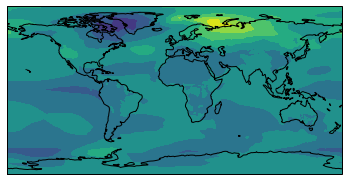

In [34]:
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon_a1, lat_a1, amoc_tas_regression_ann_a1,
             transform=ccrs.PlateCarree())

ax.coastlines()

[Text(0, 0.5, 'latitude [degrees N]'), Text(0, 0.5, 'latitude [degrees N]')]

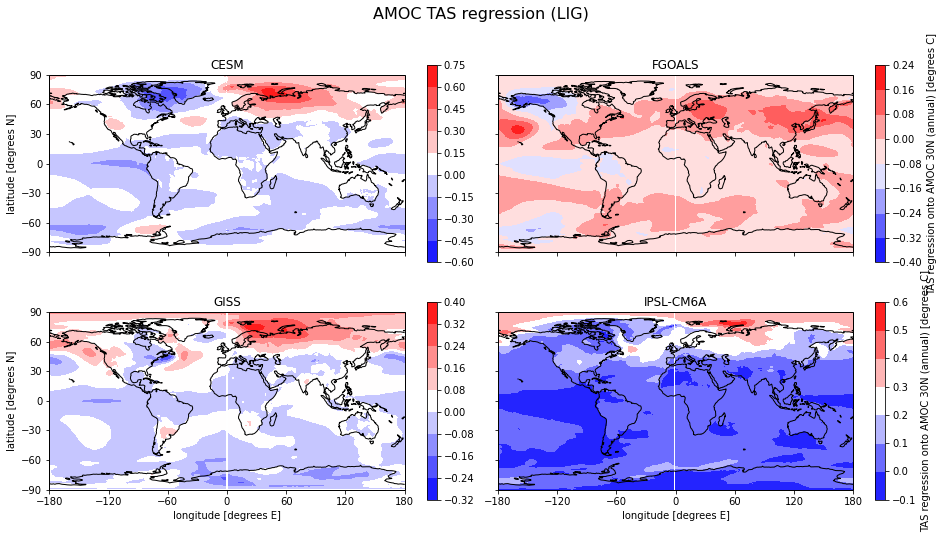

In [48]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8), sharex = 'col', sharey = 'row', gridspec_kw = {'wspace':0.01}, subplot_kw={'projection': ccrs.PlateCarree()})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('AMOC TAS regression (LIG)', fontsize = 16)


cont1 = ax1.contourf(lon_a1, lat_a1, amoc_tas_regression_ann_a1, cmap = 'bwr', transform = ccrs.PlateCarree())

cont2 = ax2.contourf(lon_a2, lat_a2, amoc_tas_regression_ann_a2, cmap = 'bwr', transform = ccrs.PlateCarree())

cont3 = ax3.contourf(lon_a3, lat_a3, amoc_tas_regression_ann_a3, cmap = 'bwr', transform = ccrs.PlateCarree())

cont4 = ax4.contourf(lon_a4, lat_a4, amoc_tas_regression_ann_a4, cmap = 'bwr', transform = ccrs.PlateCarree())

ax1.set_title('CESM')
ax2.set_title('FGOALS')
ax3.set_title('GISS')
ax4.set_title('IPSL-CM6A')

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax3.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax3.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax4.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax4.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

plt.colorbar(cont1, ax=ax1)
plt.colorbar(cont2, ax=ax2, label = 'TAS regression onto AMOC 30N (annual) [degrees C]')
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4, label = 'TAS regression onto AMOC 30N (annual) [degrees C]')

plt.setp(axs[-1, :], xlabel='longitude [degrees E]')
plt.setp(axs[:, 0], ylabel='latitude [degrees N]')

#plt.savefig('AMOC_TAS_regression_LIG.png')

[Text(0, 0.5, 'latitude [degrees N]'), Text(0, 0.5, 'latitude [degrees N]')]

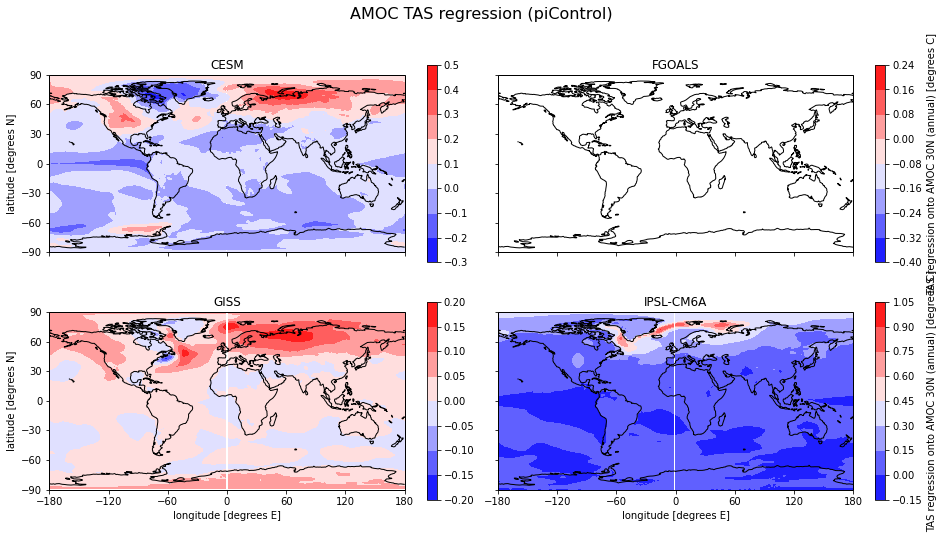

In [49]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8), sharex = 'col', sharey = 'row', gridspec_kw = {'wspace':0.01}, subplot_kw={'projection': ccrs.PlateCarree()})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('AMOC TAS regression (piControl)', fontsize = 16)


cont1 = ax1.contourf(lon_b1, lat_b1, amoc_tas_regression_ann_b1, cmap = 'bwr', transform = ccrs.PlateCarree())

#cont2 = ax2.contourf(lon_b2, lat_b2, amoc_tas_regression_ann_b2, cmap = 'bwr', transform = ccrs.PlateCarree())

cont3 = ax3.contourf(lon_b3, lat_b3, amoc_tas_regression_ann_b3, cmap = 'bwr', transform = ccrs.PlateCarree())

cont4 = ax4.contourf(lon_b4, lat_b4, amoc_tas_regression_ann_b4, cmap = 'bwr', transform = ccrs.PlateCarree())

ax1.set_title('CESM')
ax2.set_title('FGOALS')
ax3.set_title('GISS')
ax4.set_title('IPSL-CM6A')

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

ax1.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax3.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax3.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax4.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax4.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

plt.colorbar(cont1, ax=ax1)
plt.colorbar(cont2, ax=ax2, label = 'TAS regression onto AMOC 30N (annual) [degrees C]')
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4, label = 'TAS regression onto AMOC 30N (annual) [degrees C]')

plt.setp(axs[-1, :], xlabel='longitude [degrees E]')
plt.setp(axs[:, 0], ylabel='latitude [degrees N]')

#plt.savefig('AMOC_TAS_regression_piControl.png')